In [1]:

# Import Systems 
import struct
import io
import os
import sys
import time
import platform

# Import Audio
import pyaudio
import librosa
import soundfile

import numpy as np
import scipy.fft as fft
import scipy.signal as sig
import matplotlib.pyplot as plt

# User Libraries
import pyOssWavfile
import pyOssFilter
import pyRoomAcoustic as room
import pyOssDebug as dbg


In [2]:
# SET AUXARARY FILE INFORMATION
str_fileinfo = '_mono_f32_44.1k'    # 파일명에 부가된 정보

####################################
# 임펄스 음원
####################################
# SET PATH IMPULSE FILES
# imp_dir = 'impulsefiles'         # 임펄스 음원 파일이 있는 프로젝트 내 폴더명
imp_dir = 'ju_impulse'         # 임펄스 음원 파일이 있는 프로젝트 내 폴더명

# SET IMPULSE WAVE FILE NAME IN 'impulsefiles' DIRECTORY
# imp_name = "ElvedenHallMarbleHall"
# imp_name = "EmptyApartmentBedroom"
# imp_name = "FalklandPalaceRoyalTennisCourt"
# imp_name = "InsidePiano"
# imp_name = "MaesHowe"
# imp_name = "mh3_000_ortf_48k"
# imp_name = "SportsCentreUniversityOfYork"
# imp_name = "StairwayUniversityOfYork"
# imp_name = "StAndrewsChurch"
# imp_name = "TyndallBruceMonument"
# imp_name = "anechoic_gunshot_0"
# imp_name = "10s sweep for 3s reverb 48k"

# IMPULSE WAVE FILE NAME IN 'ju_impulse' DIRECTORY
# imp_name = 'ju_imp_goyang_aramnuri_concerthall'
# imp_name = 'ju_imp_sejongmunhwahuigwan_chamberhall'
imp_name = 'Impulse_201125_JU_SoundLab_Ori_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Aram_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Daegu_mono_48k_32i'
# imp_name = 'Impulse_201125_JU_SoundLab_Sejong_mono_48k_32i'

# 파일명 조합
imp_fname = pyOssWavfile.str_fname(imp_dir, imp_name)

# Check Impulse Wav file header information
st_fmt_i = pyOssWavfile.extractWavFmtChunk( pyOssWavfile.read_format(imp_fname) )
dbg.dWavInfo(st_fmt_i)

# Load Original Audio & Convert format mono / float32 / 44.1kHz 
chunk_i, data_i, st_fmt_i, t_i = pyOssWavfile.readf32( imp_fname )
dbg.dWavInfo(st_fmt_i)
print(f"Time(sec) =", t_i)


#####################################
# 무향실 음원
#####################################
# SET AUXARARY FILE INFORMATION
# str_fileinfo = '_mono_f32_44.1k'    # 파일명에 부가된 정보

# SET PATH AUDIO FILES 
audio_dir = 'audiofiles'        # 무향실 음원 파일이 있는 프로젝트 내 폴더명
# audio_dir = 'ju_anechoic'       # 무향실 음원 파일이 있는 프로젝트 내 폴더명

# AUDIO WAVE FILE NAME IN 'audiofiles' DIRECTORY
# wav_name = "adult_female_speech"
# wav_name = "bagpipe_music"
# wav_name = "bagpipe_steady_chord"
# wav_name = "flute_arpeggio"
# wav_name = "flute_music"
wav_name = "singing"
# wav_name = "tuba_arpeggio"
# wav_name = "tuba_music"

# AUDIO WAVE FILE NAME IN 'ju_anechoic' DIRECTORY
# wav_name = 'ju_anecho_Kor_Trad_Daeguem' 
# wav_name = 'ju_anecho_Kor_Trad_Gayageum'
# wav_name = 'ju_anecho_Kor_Trad_Haeguem'
# wav_name = 'ju_anecho_Kor_Trad_Janggu'
# wav_name = 'ju_anecho_Kor_Trad_Pansori'
# wav_name = 'ju_anecho_Kor_Trad_Piri'
# wav_name = 'ju_anecho_Musical_Female'
# wav_name = 'ju_anecho_Musical_Male'
# wav_name = 'ju_anecho_Thea_Dialog'
# wav_name = 'ju_anecho_Thea_Female'
# wav_name = 'ju_anecho_Thea_Male'

# 파일명 조합
wav_fname = pyOssWavfile.str_fname(audio_dir, wav_name + str_fileinfo)

# Check Wav Header Information
st_fmt_a = pyOssWavfile.extractWavFmtChunk( pyOssWavfile.read_format(wav_fname) )
dbg.dWavInfo(st_fmt_a)

# Load Original Audio & Convert format mono / float32 / 44.1kHz 
chunk_a, data_a, st_fmt_temp, t_a = pyOssWavfile.readf32( wav_fname )
print(f"Time(sec) =", t_a)


Audio Format = Int
Number of Channel = 1
Sampling Frequency = 48000
Bits per Sample = 16
Audio Format = float
Number of Channel = 1
Sampling Frequency = 44100
Bits per Sample = 32
Time(sec) = 5.461337868480726
Audio Format = float
Number of Channel = 1
Sampling Frequency = 44100
Bits per Sample = 32
Time(sec) = 4.872358276643991


# fc = 500        # Center freq for bandpass filter 500Hz
fc = 0              # No Filter
data_filt, decay, a_param = pyOssFilter.calc_filt_impulse(data_i, st_fmt_i.fs, fc, fname=imp_name)


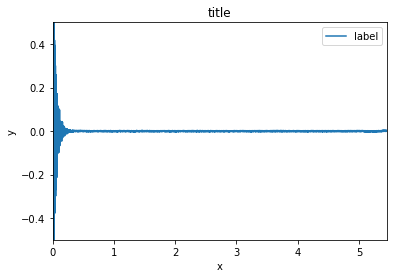

[0.00090621]
[ 1.         -0.99909379]


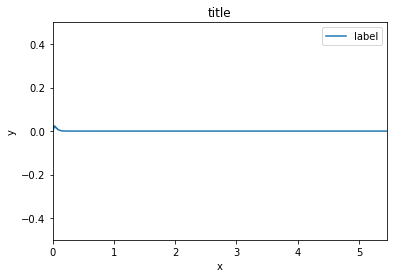

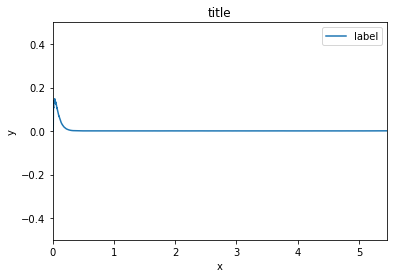

In [7]:
tau = 1.0 / 40

N = t_i * st_fmt_i.fs

T = 1 / st_fmt_i.fs
b = np.array([T / (T + tau)])
b2 = np.array([1, -tau / (T + tau)])
y = sig.lfilter(b, b2, data_i ** 2, axis=0)
Ptau = np.sqrt(y)

dbg.dPlotAudio(st_fmt_i.fs, data_i, y_range=0.5)
print(b)
print(b2)
dbg.dPlotAudio(st_fmt_i.fs, y, y_range=0.5)
dbg.dPlotAudio(st_fmt_i.fs, Ptau, y_range=0.5)


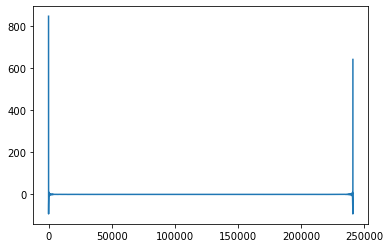

In [9]:
Ptau_fft = fft.fft(Ptau)

plt.plot(Ptau_fft)